In [1]:
import pandas as pd
import numpy as np

from scipy.stats import skewtest, levene

import matplotlib.pylab as plt
import seaborn as sbn

In [2]:
#the meaning of the increment code
#https://chess.stackexchange.com/questions/18069/what-is-the-increment-in-chess

In [3]:
df = pd.read_csv(filepath_or_buffer="./games.csv", index_col="id")
df.head(10)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
id,,,,,,,,,,,,,,,
TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4
qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10
RVN0N3VK,False,1.503680e+12,1.503680e+12,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5
dwF3DJHO,True,1.503510e+12,1.503510e+12,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6


In [4]:
df.shape

(20058, 15)

In [5]:
df.isna().sum()

rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [6]:
df["black_wins"] = df.winner=="black"
df["white_wins"] = df.winner=="white"
df["draw_game"]  = df.winner=="draw"

In [7]:
df.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,black_wins,white_wins,draw_game
id,,,,,,,,,,,,,,,,,,
TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,False,True,False
l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,True,False,False
mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,False,True,False
kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,False,True,False
9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,False,True,False


In [8]:
"""df.winner.unique()
df.winner[df.winner == "white"]= 0
df.winner[df.winner == "black"]= 1
df.winner[df.winner == "draw"] =-1
df.winner"""

'df.winner.unique()\ndf.winner[df.winner == "white"]= 0\ndf.winner[df.winner == "black"]= 1\ndf.winner[df.winner == "draw"] =-1\ndf.winner'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20058 entries, TZJHLljE to N8G2JHGG
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           20058 non-null  bool   
 1   created_at      20058 non-null  float64
 2   last_move_at    20058 non-null  float64
 3   turns           20058 non-null  int64  
 4   victory_status  20058 non-null  object 
 5   winner          20058 non-null  object 
 6   increment_code  20058 non-null  object 
 7   white_id        20058 non-null  object 
 8   white_rating    20058 non-null  int64  
 9   black_id        20058 non-null  object 
 10  black_rating    20058 non-null  int64  
 11  moves           20058 non-null  object 
 12  opening_eco     20058 non-null  object 
 13  opening_name    20058 non-null  object 
 14  opening_ply     20058 non-null  int64  
 15  black_wins      20058 non-null  bool   
 16  white_wins      20058 non-null  bool   
 17  draw_game       20058 non-

In [10]:
#df.winner = df.winner.astype(np.number)

In [11]:
df.increment_code[df.increment_code==0].sum()

0

In [12]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [34]:
df.corr(method = "pearson")

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,black_wins,white_wins,draw_game
rated,1.000000,-0.001171,-0.001176,0.090698,0.003284,0.032655,-0.001906,0.012417,-0.000743,-0.027358
created_at,-0.001171,1.000000,1.000000,0.083185,0.116170,0.133316,0.100201,0.013830,-0.024260,0.024690
last_move_at,-0.001176,1.000000,1.000000,0.083196,0.116172,0.133318,0.100203,0.013829,-0.024261,0.024694
turns,0.090698,0.083185,0.083196,1.000000,0.129753,0.160467,0.055999,0.007019,-0.079486,0.170648
white_rating,0.003284,0.116170,0.116172,0.129753,1.000000,0.634171,0.277379,-0.148371,0.128577,0.045114
black_rating,0.032655,0.133316,0.133318,0.160467,0.634171,1.000000,0.255396,0.154778,-0.171172,0.040130
opening_ply,-0.001906,0.100201,0.100203,0.055999,0.277379,0.255396,1.000000,-0.024317,0.016091,0.019121
black_wins,0.012417,0.013830,0.013829,0.007019,-0.148371,0.154778,-0.024317,1.000000,-0.909386,-0.203336
white_wins,-0.000743,-0.024260,-0.024261,-0.079486,0.128577,-0.171172,0.016091,-0.909386,1.000000,-0.222352
draw_game,-0.027358,0.024690,0.024694,0.170648,0.045114,0.040130,0.019121,-0.203336,-0.222352,1.000000


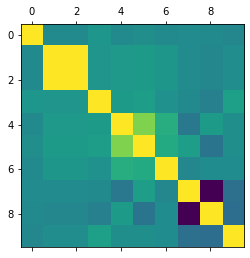

In [39]:
plt.matshow(df.corr(method = "pearson"))
plt.show()

In [29]:
df.corr(method = "kendall")

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,black_wins,white_wins,draw_game
rated,1.000000,0.018491,0.018487,0.078414,0.016970,0.032223,0.006200,0.012417,-0.000743,-0.027358
created_at,0.018491,1.000000,0.999843,0.064564,0.082012,0.093284,0.067224,0.008782,-0.016487,0.018226
last_move_at,0.018487,0.999843,1.000000,0.064623,0.082022,0.093296,0.067228,0.008777,-0.016496,0.018257
turns,0.078414,0.064564,0.064623,1.000000,0.094087,0.112748,0.036383,0.015418,-0.061636,0.108945
white_rating,0.016970,0.082012,0.082022,0.094087,1.000000,0.488251,0.179080,-0.112678,0.097721,0.034085
black_rating,0.032223,0.093284,0.093296,0.112748,0.488251,1.000000,0.157775,0.118805,-0.131322,0.030647
opening_ply,0.006200,0.067224,0.067228,0.036383,0.179080,0.157775,1.000000,-0.027501,0.022976,0.010378
black_wins,0.012417,0.008782,0.008777,0.015418,-0.112678,0.118805,-0.027501,1.000000,-0.909386,-0.203336
white_wins,-0.000743,-0.016487,-0.016496,-0.061636,0.097721,-0.131322,0.022976,-0.909386,1.000000,-0.222352
draw_game,-0.027358,0.018226,0.018257,0.108945,0.034085,0.030647,0.010378,-0.203336,-0.222352,1.000000


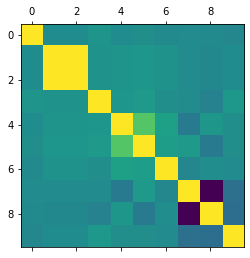

In [41]:
plt.matshow(df.corr(method = "kendall"))
plt.show()

In [32]:
df.corr(method = "spearman")

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,black_wins,white_wins,draw_game
rated,1.000000,0.022644,0.022639,0.095592,0.020758,0.039416,0.007183,0.012417,-0.000743,-0.027358
created_at,0.022644,1.000000,1.000000,0.096078,0.122735,0.139387,0.095002,0.010754,-0.020191,0.022319
last_move_at,0.022639,1.000000,1.000000,0.096164,0.122749,0.139404,0.095007,0.010748,-0.020201,0.022358
turns,0.095592,0.096078,0.096164,1.000000,0.139665,0.167086,0.051181,0.018796,-0.075139,0.132812
white_rating,0.020758,0.122735,0.122749,0.139665,1.000000,0.653759,0.250239,-0.137827,0.119532,0.041693
black_rating,0.039416,0.139387,0.139404,0.167086,0.653759,1.000000,0.220612,0.145326,-0.160637,0.037488
opening_ply,0.007183,0.095002,0.095007,0.051181,0.250239,0.220612,1.000000,-0.031865,0.026621,0.012025
black_wins,0.012417,0.010754,0.010748,0.018796,-0.137827,0.145326,-0.031865,1.000000,-0.909386,-0.203336
white_wins,-0.000743,-0.020191,-0.020201,-0.075139,0.119532,-0.160637,0.026621,-0.909386,1.000000,-0.222352
draw_game,-0.027358,0.022319,0.022358,0.132812,0.041693,0.037488,0.012025,-0.203336,-0.222352,1.000000


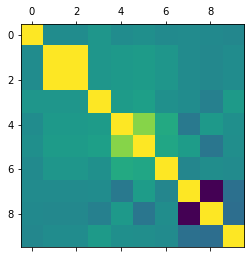

In [42]:
plt.matshow(df.corr(method = "spearman"))
plt.show()

In [14]:
df.winner.value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

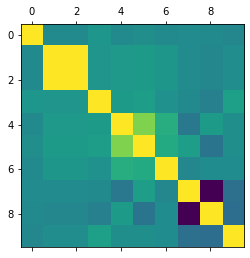

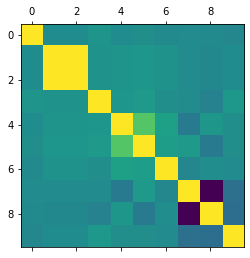

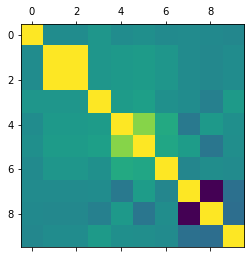

In [44]:
plt.matshow(df.corr(method = "pearson"))
plt.show() 
plt.matshow(df.corr(method = "kendall"))
plt.show()
plt.matshow(df.corr(method = "spearman"))
plt.show()

In [15]:
#df.winner.value_counts().plot(kind="pie", autopct='%1.1f%%',  figsize=(10,10))

In [16]:
#df.opening_eco.value_counts().plot(kind="pie", rotatelabels=True, radius=2, figsize=(15,15))

In [17]:
len(df.opening_name.unique())-len(df.opening_eco.unique())

1112

In [18]:
print(df.opening_name.value_counts().sort_values(ascending=False))

Van't Kruijs Opening                                                 368
Sicilian Defense                                                     358
Sicilian Defense: Bowdler Attack                                     296
Scotch Game                                                          271
French Defense: Knight Variation                                     271
                                                                    ... 
Amazon Attack: Siberian Attack                                         1
Italian Game: Scotch Gambit                                            1
Semi-Slav Defense: Marshall Gambit |  Main Line                        1
Queen's Indian Defense: Classical Variation |  Polugaevsky Gambit      1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation           1
Name: opening_name, Length: 1477, dtype: int64


In [19]:
df_pivot = df.pivot_table(index=["victory_status"], columns="opening_eco", values=["black_rating", "white_rating", "rated", "turns" ], aggfunc=np.sum)
df_pivot

black_rating                                                 \
opening_eco             A00       A01      A02      A03       A04      A05   
victory_status                                                               
draw                56159.0   11868.0   8790.0  16931.0   44355.0   4993.0   
mate               620768.0   77224.0  62824.0  32628.0  131636.0   5127.0   
outoftime          118982.0   32054.0   7286.0  12728.0   42409.0   3683.0   
resign             710569.0  150401.0  52298.0  65293.0  237028.0  14339.0   

                                                     ... white_rating          \
opening_eco          A06      A07      A08      A09  ...          E81     E87   
victory_status                                       ...                        
draw             11190.0   9957.0   7898.0      NaN  ...          NaN     NaN   
mate             50273.0   6509.0  13131.0  10669.0  ...       3576.0     NaN   
outoftime        10340.0      NaN   3378.0   2005.0  ...       2008.0     NaN   
resign          122784.0  37293.0  44458.0  16410.0  ...       7376.0  5505.0   

                                                                         \
opening_eco        E88      E90     E91     E92     E94     E95     E97   
victory_status                                                            
draw               NaN      NaN  1500.0  5404.0     NaN     NaN  2273.0   
mate            1996.0   6707.0  5293.0  1474.0  1560.0     NaN  4158.0   
outoftime          NaN  11044.0     NaN  1937.0     NaN     NaN     NaN   
resign          3553.0  32029.0  6495.0     NaN  9549.0  2196.0     NaN   

                        
opening_eco        E98  
victory_status          
draw               NaN  
mate               NaN  
outoftime          NaN  
resign          4257.0  

[4 rows x 1460 columns]

In [20]:
df.columns

Index(['rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply',
       'black_wins', 'white_wins', 'draw_game'],
      dtype='object')

In [21]:
df_group = df.groupby(by=["opening_eco", "victory_status"])[["black_wins", "white_wins", "draw_game"]]
df_group.groups.keys()

dict_keys([('A00', 'draw'), ('A00', 'mate'), ('A00', 'outoftime'), ('A00', 'resign'), ('A01', 'draw'), ('A01', 'mate'), ('A01', 'outoftime'), ('A01', 'resign'), ('A02', 'draw'), ('A02', 'mate'), ('A02', 'outoftime'), ('A02', 'resign'), ('A03', 'draw'), ('A03', 'mate'), ('A03', 'outoftime'), ('A03', 'resign'), ('A04', 'draw'), ('A04', 'mate'), ('A04', 'outoftime'), ('A04', 'resign'), ('A05', 'draw'), ('A05', 'mate'), ('A05', 'outoftime'), ('A05', 'resign'), ('A06', 'draw'), ('A06', 'mate'), ('A06', 'outoftime'), ('A06', 'resign'), ('A07', 'draw'), ('A07', 'mate'), ('A07', 'resign'), ('A08', 'draw'), ('A08', 'mate'), ('A08', 'outoftime'), ('A08', 'resign'), ('A09', 'mate'), ('A09', 'outoftime'), ('A09', 'resign'), ('A10', 'draw'), ('A10', 'mate'), ('A10', 'outoftime'), ('A10', 'resign'), ('A11', 'mate'), ('A11', 'outoftime'), ('A11', 'resign'), ('A12', 'resign'), ('A13', 'draw'), ('A13', 'mate'), ('A13', 'outoftime'), ('A13', 'resign'), ('A14', 'resign'), ('A15', 'draw'), ('A15', 'mate')

In [22]:
pd.options.display.max_rows=600

In [23]:
39+281+135+50+29+239+234

1007

In [24]:
df_group.sum().head(20)

black_wins  white_wins  draw_game
opening_eco victory_status                                   
A00         draw                     0           0         39
            mate                   281         135          0
            outoftime               50          29          0
            resign                 239         234          0
A01         draw                     0           0          8
            mate                    27          21          0
            outoftime                9          10          0
            resign                  44          45          0
A02         draw                     0           0          5
            mate                    26          13          0
            outoftime                3           2          0
            resign                  16          17          0
A03         draw                     0           0         10
            mate                    14           8          0
            outoftime                4           3          0
            resign                  20          19          0
A04         draw                     0           0         27
            mate                    32          55          0
            outoftime                9          16          1
            resign                  60          85          0

In [25]:
df_group2 = df.groupby(by=["opening_eco"])[["black_wins", "white_wins", "draw_game"]]

In [27]:
#df_group2["mate"] = df_group2.white_wins+df_group2.black_wins

In [ ]:
df_group2.groups.keys()